# Filter ibtracs

In [ ]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut
import pandas as pd

In [4]:
min_year = 1980
hours = ["00", "06", "12", "18"]

ut.filter_tracks(min_year=min_year, hours=hours)

In [5]:
import pickle

with open("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/valid_dates_1980_00_06_12_18.pkl", "rb") as fi:
    valid_dates = pickle.load(fi)
valid_dates

{'1980': {'12': array(['22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
        dtype=object)},
 '1981': {'11': array(['12', '13', '14', '15', '16', '17'], dtype=object)},
 '1982': {'09': array(['30'], dtype=object),
  '10': array(['01', '02'], dtype=object)},
 '1983': {'11': array(['26', '27', '28', '29', '30'], dtype=object)},
 '1984': {'12': array(['19', '20', '21', '22', '23', '24', '25', '26', '27', '28'],
        dtype=object)},
 '1985': {'11': array(['15', '16', '17', '18', '19', '20', '21', '22', '23'], dtype=object)},
 '1986': {'12': array(['26', '27', '28', '29', '30', '31'], dtype=object)},
 '1987': {'10': array(['09', '10', '11', '12', '13'], dtype=object)},
 '1988': {'11': array(['17', '18', '19', '20', '21', '22', '23', '24'], dtype=object)},
 '1989': {'11': array(['28', '29', '30'], dtype=object),
  '12': array(['01', '02', '03', '04'], dtype=object)},
 '1990': {'11': array(['16', '17', '18'], dtype=object)},
 '1991': {'11': array(['07', '08', '09', '10', '11

# Taking the first TC of 1019

In [3]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut
import pandas as pd
import numpy as np

path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string")[1:]
tc_id = "2019326S08163"
#df.head()
df[df["SID"]==tc_id].iloc[[0, 1, -2, -1]]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
692574,2019326S08163,2020,101,SP,MM,RITA,2019-11-22 00:00:00,NR,-7.50000,163.000,...,,,,,,,,,9,103
692575,2019326S08163,2020,101,SP,MM,RITA,2019-11-22 03:00:00,NR,-7.60259,163.450,...,,,,,,,,,9,103
692629,2019326S08163,2020,101,SP,MM,RITA,2019-11-28 21:00:00,NR,-14.2500,169.535,...,,,,,,,,,4,44
692630,2019326S08163,2020,101,SP,MM,RITA,2019-11-29 00:00:00,NR,-14.1000,169.700,...,,,,,,,,,4,46


In [12]:
import xarray as xr

ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2019-11-22T00_to_2019-11-29T00_ldt_168_6.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                        (lat: 721, lon: 1440, channel: 73, time: 29,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 90.0 89.75 ... -89.75 -90.0
  * lon                            (lon) float64 0.0 0.25 0.5 ... 359.5 359.8
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2019-11-22 ... 2019-...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [18]:
ds_new = ut.cut_rectangle(ds=ds, df_tracks=df, tc_id=tc_id)
ds_new

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 29,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 30.0 29.75 ... -29.75 -30.0
  * lon                            (lon) float64 133.0 133.2 ... 192.8 193.0
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2019-11-22 ... 2019-...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [21]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut
import pandas as pd
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string", na_filter=False)[1:]
df[df["SID"]=="2008185N13337"] # almost 17 days !!!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
620594,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-03 06:00:00,TS,12.7000,-22.9000,...,,,,,,,,,12,294
620595,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-03 09:00:00,TS,12.9327,-23.4422,...,,,,,,,,,11,290
620596,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-03 12:00:00,TS,13.1000,-24.0000,...,,,,,,,,,11,282
620597,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-03 15:00:00,TS,13.1649,-24.5852,...,,,,,,,,,12,275
620598,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-03 18:00:00,TS,13.2000,-25.2000,...,,,,12,30,30,,30,12,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620734,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-20 18:00:00,ET,53.0000,-34.0000,...,,,,,,,,,31,36
620735,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-20 21:00:00,ET,54.0155,-32.5410,...,,,,,,,,,27,40
620736,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-21 00:00:00,ET,55.1000,-31.0000,...,,,,,,,,,33,36
620737,2008185N13337,2008,35,NA,NA,BERTHA,2008-07-21 03:00:00,ET,56.6568,-29.1617,...,,,,,,,,,40,33


In [ ]:
# write 6 months of data into input params

ut.write_params_for_period(output_path="/users/lpoulain/louis/TCBench_0.1/input_params/", start_date="20200301", end_date="20200831", max_lead=168, step=12, debug=False)

In [14]:
# take the first tc for several seasons and writes params

seasons = ["2019", "2020", "2021", "2022", "2023"]
for season in seasons:
    ut.write_params_for_tc(f"./input_params/{season}/", df, TC_id=None, season=season, step=6, max_lead=168, debug=False)

TC id: 2018256S07076 (2019)
TC id: 2019326S08163 (2020)
TC id: 2020317S04092 (2021)
TC id: 2021323S10103 (2022)
TC id: 2022210S11095 (2023)


In [3]:
# take one tc/basin for several seasons and writes params

%load_ext autoreload
%autoreload 2
import scripts.utils as ut

seasons = ["2008", "2023"]	
ut.write_several_seasons(output_path=f"./input_params/", seasons=seasons, step=6, max_lead=168, 
                          ibtracs_path='/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/ibtracs.ALL.list.v04r00.csv',
                          as_range=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Seasons: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## Distance calculator

In [24]:
step = 6 # one week
max_dist = ut.max_historical_distance_within_step(df, step)

1/5975
597/5975
1194/5975
1791/5975
2388/5975
2985/5975
3582/5975
4179/5975
4776/5975
5373/5975
5970/5975
Max dist: 645.3430433993034km (TC 2013167N12128, idx [54, 649123]).


1160.8241250016658 711.5864254399107


Text(0.5, 1.0, 'Distribution of distances traveled by TCs during a week\nMax: 6134.251 km, Mean: 1160.824 km, Std: 711.586 km')

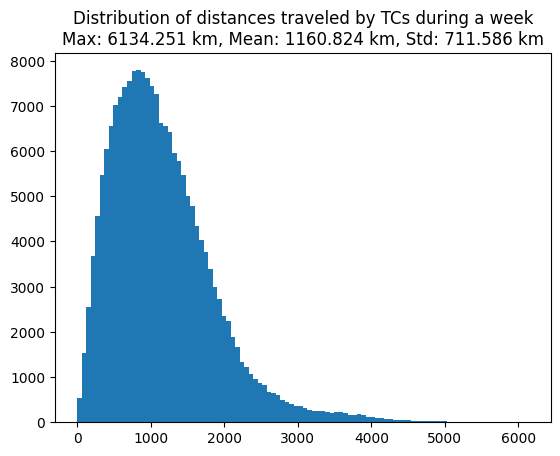

In [22]:
import numpy as np
import matplotlib.pyplot as plt
"""
d6 = np.load("./6h_dists.npy")
print(np.mean(d), np.std(d))
print([np.count_nonzero(d>dmax) for dmax in [400, 600, 800, 1000, 1200, 1400]])
plt.figure()
_, _, _ = plt.hist(d[d>400], bins=100)
"""	
d168 = np.load("./168h_dists.npy")
print(np.mean(d168), np.std(d168))
plt.figure()
_, _, _ = plt.hist(d168, bins=100)
plt.title("Distribution of distances traveled by TCs during a week"+f"\nMax: {np.max(d168):.3f} km, Mean: {np.mean(d168):.3f} km, Std: {np.std(d168):.3f} km")

Text(0.5, 1.0, 'Max dist: 6613.037 km,\n Mean: 897.536 km, Std: 695.732 km')

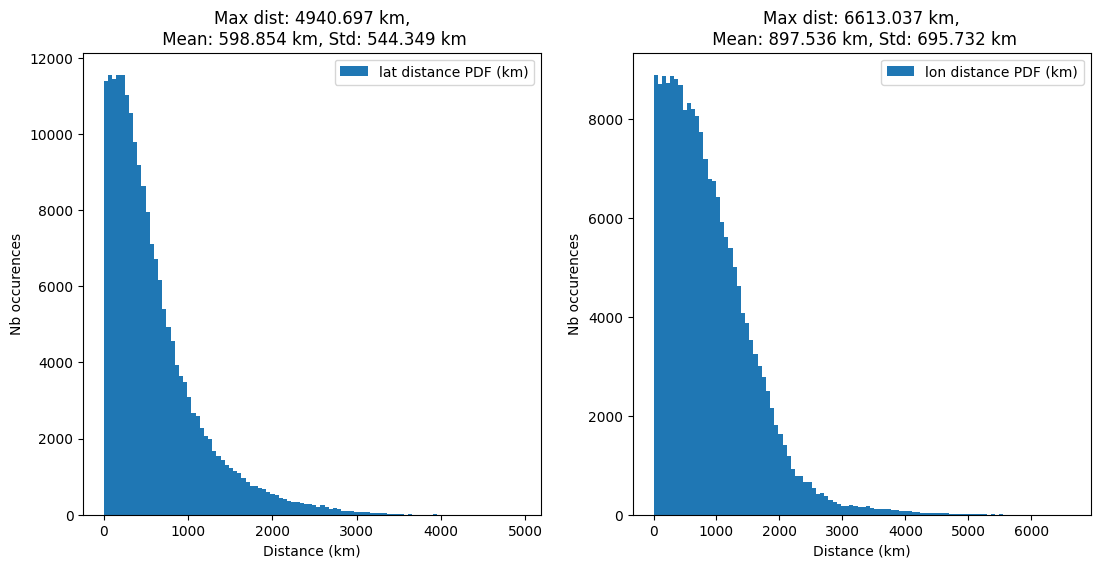

In [23]:
d168_lat = np.load("./168h_dists_lats.npy")
d168_lon = np.load("./168h_dists_lons.npy")

fig, axs = plt.subplots(1, 2, figsize=(13, 6))
ax1, ax2 = axs
ax1.hist(d168_lat, bins=100, label="lat distance PDF (km)")
ax1.set_title(f"Max dist: {d168_lat.max():.3f} km,\n Mean: {np.mean(d168_lat):.3f} km, Std: {np.std(d168_lat):.3f} km")
ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Nb occurences")
ax1.legend()

ax2.hist(d168_lon, bins=100, label="lon distance PDF (km)")
ax2.set_xlabel("Distance (km)")
ax2.set_ylabel("Nb occurences")
ax2.legend()
ax2.set_title(f"Max dist: {d168_lon.max():.3f} km,\n Mean: {np.mean(d168_lon):.3f} km, Std: {np.std(d168_lon):.3f} km")

# Combine predictions

In [19]:
import pandas as pd

path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string")
df[df["SID"]=="2007365S15134"]

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
618329,2007365S15134,2008,94,SI,WA,HELEN,2007-12-30 18:00:00,NR,-14.6000,134.400,...,,,,,,,,,5,126
618330,2007365S15134,2008,94,SI,WA,HELEN,2007-12-30 21:00:00,NR,-14.7526,134.615,...,,,,,,,,,4,122
618331,2007365S15134,2008,94,SI,WA,HELEN,2007-12-31 00:00:00,NR,-14.8250,134.775,...,,,,,,,,,4,127
618332,2007365S15134,2008,94,SI,WA,HELEN,2007-12-31 03:00:00,NR,-14.9758,134.915,...,,,,,,,,,4,147
618333,2007365S15134,2008,94,SP,EA,HELEN,2007-12-31 06:00:00,NR,-15.1571,135.000,...,,,,,,,,,4,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618385,2007365S15134,2008,94,SP,EA,HELEN,2008-01-06 18:00:00,TS,-14.4000,142.000,...,,,,,,,,,6,105
618386,2007365S15134,2008,94,SP,EA,HELEN,2008-01-06 21:00:00,TS,-14.4849,142.285,...,,,,,,,,,6,109
618387,2007365S15134,2008,94,SP,EA,HELEN,2008-01-07 00:00:00,TS,-14.6000,142.600,...,,,,,,,,,7,111
618388,2007365S15134,2008,94,SP,EA,HELEN,2008-01-07 03:00:00,TS,-14.7427,142.980,...,,,,,,,,,8,111


In [ ]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

ut.combine_in_series(output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model_name="pangu", remove_old=False, start_in="2008-07-22")

In [1]:
import xarray as xr

ds1 = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2019-11-22T00_to_2019-11-29T00_ldt_168_6.nc")
ds2 = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_d_20191122_t_0000_30h.grib")
ds1

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/work/FAC/FGSE/IDYST/tbeucler/default/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/work/FAC/FGSE/IDYST/tbeucler/default/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/work/FAC/FGSE/IDYST/tbeucler/default/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/work/FAC/FGSE/IDYST/tbeucler/default/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py"

<xarray.Dataset>
Dimensions:            (time: 28, latitude: 721, longitude: 1440,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2019-11-22T06:00:00 ... 2019-11-29
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables:
    heightAboveGround  float64 ...
    t2m                (time, latitude, longitude) float32 ...
    meanSea            float64 ...
    msl                (time, latitude, longitude) float32 ...
    t                  (time, isobaricInhPa, latitude, longitude) float32 ...
    z                  (time, isobaricInhPa, latitude, longitude) float32 ...
    u                  (time, isobaricInhPa, latitude, longitude) float32 ...
    v                  (time, isobaricInhPa, latitude, longitude) float32 ...
    w                  (time, isobaricInhPa, latitude, longitude) float32 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 ...
    u10                (time, latitude, longitude) float32 ...
    v10                (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-11-23T09:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [1]:
(241, 241) // 2

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

In [2]:
import numpy as np
ds12 = ds1.sel(time="2019-11-23T06:00:00")

print(np.count_nonzero(ds12["u"].values!=ds2["u"].values))

0


## Earth2mip predictions

In [1]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

ut.e2mip_renaming(folder_name="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model="fourcastnetv2", remove_old=False)

1/171: 2007-12-30T18 to 2008-01-06T18
2/171: 2008-09-23T12 to 2008-09-30T12
3/171: 2008-09-23T18 to 2008-09-30T18
4/171: 2008-09-24T00 to 2008-10-01T00
5/171: 2008-09-24T06 to 2008-10-01T06
6/171: 2008-09-24T12 to 2008-10-01T12
7/171: 2008-09-24T18 to 2008-10-01T18
8/171: 2008-09-25T00 to 2008-10-02T00
9/171: 2008-09-25T06 to 2008-10-02T06
10/171: 2008-09-25T12 to 2008-10-02T12
11/171: 2008-09-25T18 to 2008-10-02T18
12/171: 2008-09-26T00 to 2008-10-03T00
13/171: 2008-09-26T06 to 2008-10-03T06
14/171: 2008-09-26T12 to 2008-10-03T12
15/171: 2008-09-26T18 to 2008-10-03T18
16/171: 2008-09-27T00 to 2008-10-04T00
17/171: 2008-09-27T06 to 2008-10-04T06
18/171: 2008-09-27T12 to 2008-10-04T12
19/171: 2008-09-27T18 to 2008-10-04T18
20/171: 2008-09-28T00 to 2008-10-05T00
21/171: 2008-09-28T06 to 2008-10-05T00
22/171: 2008-09-28T12 to 2008-10-05T00
23/171: 2008-09-28T18 to 2008-10-05T00
24/171: 2008-09-29T00 to 2008-10-05T00
25/171: 2008-09-29T06 to 2008-10-05T00
26/171: 2008-09-29T12 to 2008-10-0

# Save small regions

In [6]:
"""from scripts import utils as ut
import pandas as pd
import xarray as xr
import numpy as np
%load_ext autoreload
%autoreload 2

ds_path = "/scratch/lpoulain/panguweather/pangu_d_20180913_t_0600_lt_6-144h.nc"
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
ibtracs_df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string").loc[1:]"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#ut.cut_and_save_rect(ds_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     date_start="2019-11-22T00", date_end="2019-11-29T00", lead_time=168, df_tracks=ibtracs_df, 
#                     output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     tc_id="2019326S08163")

In [1]:
from scripts.scripts import utils as ut
import xarray as xr
%load_ext autoreload
%autoreload 2

ut.cut_save_in_series(ds_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/", models=["pangu"],
                      output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/", parallel=False)

Model: pangu

2008-09-26T18 to 2008-10-03T18 (168h) - 283/546
2008-09-27T00 to 2008-10-04T00 (168h) - 284/546
2008-09-27T00 to 2008-10-04T00 (168h) - 285/546
2008-09-27T06 to 2008-10-04T06 (168h) - 286/546
2008-09-27T06 to 2008-10-04T06 (168h) - 287/546
2008-09-27T12 to 2008-10-04T12 (168h) - 288/546
2008-09-27T18 to 2008-10-04T18 (168h) - 289/546
2008-09-27T18 to 2008-10-04T18 (168h) - 290/546
2008-09-28T00 to 2008-10-05T00 (168h) - 291/546
2008-09-28T00 to 2008-10-05T00 (168h) - 292/546
2008-09-28T06 to 2008-10-05T00 (162h) - 293/546
2008-09-28T06 to 2008-10-05T00 (162h) - 294/546
2008-09-28T12 to 2008-10-05T00 (156h) - 295/546
2008-09-28T12 to 2008-10-05T00 (156h) - 296/546
2008-09-28T18 to 2008-10-05T00 (150h) - 297/546
2008-09-28T18 to 2008-10-05T00 (150h) - 298/546
2008-09-29T00 to 2008-10-05T00 (144h) - 299/546
2008-09-29T00 to 2008-10-05T00 (144h) - 300/546
2008-09-29T06 to 2008-10-05T00 (138h) - 301/546
2008-09-29T06 to 2008-10-05T00 (138h) - 302/546
2008-09-29T12 to 2008-10-0

In [2]:
ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2019-11-22T00_to_2019-11-29T00_ldt_168_2019326S08163.nc")
#a = list(ds.data_vars)[0]
#ds[f"{a}"]
#list(ds["channel"]).index('v10m')
ds

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 29,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 30.0 29.75 ... -29.75 -30.0
  * lon                            (lon) float64 133.0 133.2 ... 192.8 193.0
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2019-11-22 ... 2019-...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

# Create Dataset

In [1]:
from dataset import create_dataset
from scripts import utils as ut
import xarray as xr
import numpy as np
import pandas as pd
import glob
%load_ext autoreload
%autoreload 2

df_tracks = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/"+\
    "tracks/ibtracs/ibtracs.ALL.list.v04r00.csv", dtype="string", na_filter=False).loc[1:]

print(len(df_tracks[df_tracks["ISO_TIME"].astype("datetime64[ns]")>np.datetime64("1980")]))
print(len([w for w in df_tracks[df_tracks["ISO_TIME"].astype("datetime64[ns]")>np.datetime64("1980")]["WMO_WIND"].values if w not in [' ', " "]]), "\n")
print(df_tracks[df_tracks["ISO_TIME"].astype("datetime64[ns]")>np.datetime64("1990")].iloc[:5][["ISO_TIME","WMO_WIND"]])
        

In [2]:
model = "pangu"
model_folder = "panguweather" if model=="pangu" else model
tc_ids = np.unique([ut.get_tc_id_nc(file) for file in glob.glob(f"/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/{model_folder}/{model}*_small.nc")])
print(tc_ids)

['2007365S15134' '2008079S12069' '2008083S12102' '2008185N13337'
 '2008193N20126' '2008194N11266' '2008198N10265' '2008201N32280'
 '2008203N18276' '2008268N12140' '2008270N39325' '2008272N08139'
 '2008275N16245' '2008278N13261' '2008319S07086' '2008320N23146'
 '2008323S08089' '2009008S13069' '2009011S16140' '2009024S17123'
 '2009025S12177' '2009308N11279' '2009313N11072' '2010066S19050'
 '2010067S25317' '2010069S12188' '2010070S15168' '2010203N22286']


In [ ]:
vars = {"msl":[0], "u10":[0], "v10":[0]}
create_dataset(data_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/", model_name="pangu", 
                       tc_ids=tc_ids, df_tracks=df_tracks, vars=vars, size=241)

In [ ]:
np.timedelta64(np.datetime64("2019-11-02T00:00:00.000000000")-np.timedelta64(5, 'h')).astype(int)

In [14]:
ds = xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2008-09-26T18_to_2008-10-03T18_ldt_168_6_2008270N39325_small.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:        (time: 28, isobaricInhPa: 13, latitude: 241, longitude: 241)
Coordinates:
  * time           (time) datetime64[ns] 2008-09-27 ... 2008-10-03T18:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
  * latitude       (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude      (longitude) float64 295.0 295.2 295.5 ... 354.5 354.8 355.0
Data variables:
    z              (time, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-11-28T15:09 GRIB to CDM+CF via cfgrib-0.9.1...